# Player performance matric

### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Load data:

In [2]:
df = pd.read_csv('Final data.csv')
df.drop(columns=df.columns[0], axis=1, inplace=True)

In [3]:
df.head()

,Name,Nationality,Club,Position,Apps,Minutes Played,Distance Run (km),Average Rating,Player of the Match,Goals,...,Ref,TRO,Sta,Str,Tck,Tea,Tec,Thr,Vis,Wor
0,A Singular Tub of FazeBerry ® GFuel ® Energy F...,"""English""","""Athênai F.C.""","""WB/M (R)""",1.0,90,13.2,6.9,0,1,...,1.0,1.0,20.0,10.0,8.0,9.0,9.0,1.0,9.0,10.0
1,Aleksandar Stojakovic,"""Serbian""","""Inter London""","""D (C). DM""",1.0,90,11.4,7.9,0,1,...,1.0,1.0,20.0,10.0,13.0,11.0,5.0,1.0,5.0,12.0
2,Alessio Calvatore,"""Italian""","""Cairo City""","""DM. M (C)""",1.0,90,10.9,7.2,0,0,...,1.0,1.0,20.0,10.0,10.0,12.0,13.0,1.0,11.0,12.0
3,Alfredo Puttanesca,"""Canadian""","""Cairo City""","""WB/M (L)""",1.0,90,13.0,7.5,0,1,...,2.0,3.0,20.0,10.0,9.0,7.0,10.0,2.0,7.0,8.0
4,Andreas Aadnevik,"""Norwegian""","""Athênai F.C.""","""ST (C)""",1.0,90,12.8,6.1,0,0,...,1.0,1.0,20.0,10.0,5.0,8.0,5.0,1.0,5.0,8.0


## Average Rating

### Data frame for Avg. rating

Data frame for Average rating - A grade given by FM for the player's overall performance in the game

In [4]:
df_rat = pd.DataFrame(df.iloc[: , 7].copy())
temp = df.iloc[: , 46:93].copy()
df_rat = df_rat.join(temp)

In [5]:
df_rat = df_rat.dropna()

In [6]:
#df_rat.isnull().sum()

In [7]:
df_rat.head()

,Average Rating,Acc,Aer,Agg,Agi,Ant,Bal,Bra,Cmd,Com,...,Ref,TRO,Sta,Str,Tck,Tea,Tec,Thr,Vis,Wor
0,6.9,13.0,1.0,7.0,13.0,10.0,10.0,6.0,1.0,1.0,...,1.0,1.0,20.0,10.0,8.0,9.0,9.0,1.0,9.0,10.0
1,7.9,7.0,1.0,10.0,5.0,12.0,10.0,11.0,1.0,1.0,...,1.0,1.0,20.0,10.0,13.0,11.0,5.0,1.0,5.0,12.0
2,7.2,10.0,1.0,5.0,5.0,8.0,10.0,5.0,1.0,1.0,...,1.0,1.0,20.0,10.0,10.0,12.0,13.0,1.0,11.0,12.0
3,7.5,11.0,1.0,5.0,12.0,8.0,11.0,6.0,4.0,3.0,...,2.0,3.0,20.0,10.0,9.0,7.0,10.0,2.0,7.0,8.0
4,6.1,14.0,1.0,5.0,10.0,14.0,5.0,5.0,1.0,1.0,...,1.0,1.0,20.0,10.0,5.0,8.0,5.0,1.0,5.0,8.0


In [8]:
df_rat.shape

(9415, 48)

### Feature engineering:

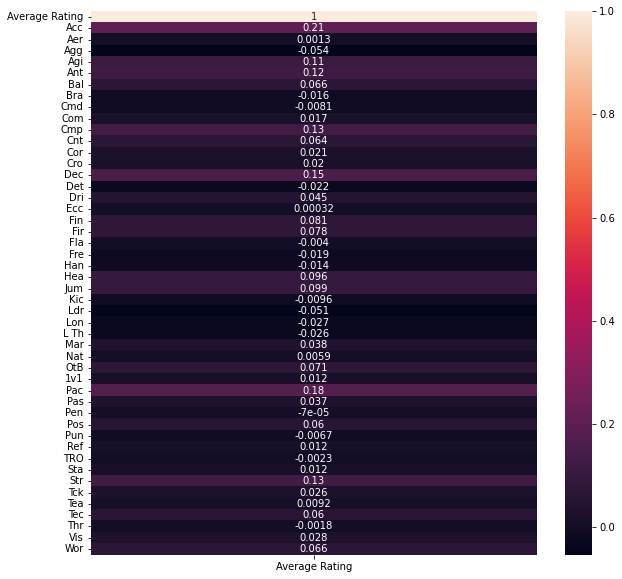

In [9]:
# Correlation of features with xG
plt.figure(figsize=(10,10))
sns.heatmap(df_rat.corr()[['Average Rating']], annot=True)
plt.show()

### Splitting into the test set and training set

In [10]:
training_set = df_rat.iloc[:, :].values
X = training_set[:, 1:48]
y = training_set[:,0]

In [11]:
X.shape

(9415, 47)

In [12]:
y.shape

(9415,)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [14]:
X_train.shape

(7532, 47)

In [15]:
X_test.shape

(1883, 47)

### Feature Scaling

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Linear regression baseline model (mae: 0.422, rmse: 0.563)

In [21]:
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [22]:
# create linear regression object
reg = linear_model.LinearRegression()

In [23]:
# train the model using the training sets
reg.fit(X_train, y_train)

LinearRegression()

In [24]:
# make predictions on the test set
y_pred_reg = reg.predict(X_test)

In [25]:
# RMSE
mean_squared_error(y_test, y_pred_reg, squared=False)

0.5632607270686594

In [26]:
mean_absolute_error(y_test, y_pred_reg)

0.4228728826856559

### ANN simple (mae: 0.421, rmse: 0.569)

In [27]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [28]:
regressor = Sequential()

In [29]:
#adding the input layer and the first hidden layer with dropout
regressor.add(Dense(units = 100, kernel_initializer = 'normal',activation = 'relu', input_dim =47))
regressor.add(Dropout(0.01))

In [30]:
#adding the second hidden layer
regressor.add(Dense(units = 100, kernel_initializer = 'normal',activation = 'relu'))
regressor.add(Dropout(0.01))

In [31]:
#adding a thrid hidden layer
regressor.add(Dense(units = 100, kernel_initializer = 'normal',activation = 'relu'))
regressor.add(Dropout(0.01))

In [32]:
#adding a fourth hidden layer
regressor.add(Dense(units = 100, kernel_initializer = 'normal',activation = 'relu'))
regressor.add(Dropout(0.01))

In [33]:
#adding the output layer
regressor.add(Dense(units = 1, kernel_initializer = 'normal',activation = 'linear'))

In [34]:
#compiling the ANN
regressor.compile(optimizer = 'rmsprop', loss = 'mean_absolute_error', metrics = ['mean_absolute_error'])

In [35]:
#del regressor
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4800      
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               1

In [36]:
#Fitting the ANN to the training set
regressor.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
754/754 [==============================] - 3s 2ms/step - loss: 0.8835 - mean_absolute_error: 0.8835
Epoch 2/100
754/754 [==============================] - 2s 2ms/step - loss: 0.6425 - mean_absolute_error: 0.6425
Epoch 3/100
754/754 [==============================] - 1s 2ms/step - loss: 0.5701 - mean_absolute_error: 0.5701
Epoch 4/100
754/754 [==============================] - 2s 3ms/step - loss: 0.5311 - mean_absolute_error: 0.5311
Epoch 5/100
754/754 [==============================] - 4s 5ms/step - loss: 0.5051 - mean_absolute_error: 0.5051
Epoch 6/100
754/754 [==============================] - 3s 4ms/step - loss: 0.4816 - mean_absolute_error: 0.4816
Epoch 7/100
754/754 [==============================] - 2s 3ms/step - loss: 0.4699 - mean_absolute_error: 0.4699
Epoch 8/100
754/754 [==============================] - 4s 6ms/step - loss: 0.4676 - mean_absolute_error: 0.4676
Epoch 9/100
754/754 [==============================] - 4s 6ms/step - loss: 0.4646 - mean_absolute_error:

In [37]:
y_pred_nn = regressor.predict(X_test)

59/59 [==============================] - 0s 1ms/step


In [39]:
# RMSE
mean_squared_error(y_test, y_pred_nn, squared=False)

0.5697394965841595

In [40]:
# MAE
mae_ann = mean_absolute_error(y_test, y_pred_nn)
mae_ann

0.42177459626646036

### Tuning the ANN model

In [57]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

from keras.models import Sequential
from keras.layers import Dense
def build_regressor(optimizer):
    regressor = Sequential()
    regressor.add(Dense(units = 7, kernel_initializer = 'normal',activation = 'relu', input_dim =47))
    regressor.add(Dense(units = 7, kernel_initializer = 'normal',activation = 'relu'))
    regressor.add(Dense(units = 7, kernel_initializer = 'normal',activation = 'relu'))
    regressor.add(Dense(units = 7, kernel_initializer = 'normal',activation = 'relu'))
    regressor.add(Dense(units = 1, kernel_initializer = 'normal',activation = 'linear'))
    regressor.compile(optimizer = optimizer, loss = 'mean_absolute_error', metrics = ['mean_absolute_error'])     
    return regressor

regressor = KerasRegressor(build_fn = build_regressor)

parameters = {'batch_size': [4,8],
              'nb_epoch': [500,1000],
              'optimizer': ['adam', 'rmsprop', 'sgd']}

grid_search = GridSearchCV(estimator = regressor,
                           param_grid = parameters,
                           scoring = 'neg_mean_absolute_error',
                           cv =10)

#this might take a while 
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

<ipython-input-57-99ed82c9dd14>:16: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  regressor = KerasRegressor(build_fn = build_regressor)


1883/1883 [==============================] - 3s 2ms/step - loss: 1.3230 - mean_absolute_error: 1.3230


In [58]:
best_parameters

{'batch_size': 4, 'nb_epoch': 500, 'optimizer': 'sgd'}

### Best settings of ANN (mae: 0.415, rmse: 0.569)

In [59]:
regressor_best = Sequential()

regressor_best.add(Dense(units = 7, kernel_initializer = 'normal',activation = 'relu', input_dim =47))
regressor_best.add(Dropout(0.01))

regressor_best.add(Dense(units = 7, kernel_initializer = 'normal',activation = 'relu'))
regressor_best.add(Dropout(0.01))

regressor_best.add(Dense(units = 7, kernel_initializer = 'normal',activation = 'relu'))
regressor_best.add(Dropout(0.01))

regressor_best.add(Dense(units = 7, kernel_initializer = 'normal',activation = 'relu'))
regressor_best.add(Dropout(0.01))

regressor_best.add(Dense(units = 1, kernel_initializer = 'normal',activation = 'linear'))

regressor_best.compile(optimizer = 'sgd', loss = 'mean_absolute_error', metrics = ['mean_absolute_error'])

regressor_best.fit(X_train, y_train, batch_size = 4, epochs = 500)

Epoch 1/500
1883/1883 [==============================] - 5s 2ms/step - loss: 1.3775 - mean_absolute_error: 1.3775
Epoch 2/500
1883/1883 [==============================] - 3s 2ms/step - loss: 0.4861 - mean_absolute_error: 0.4861
Epoch 3/500
1883/1883 [==============================] - 3s 2ms/step - loss: 0.4881 - mean_absolute_error: 0.4881
Epoch 4/500
1883/1883 [==============================] - 3s 2ms/step - loss: 0.4854 - mean_absolute_error: 0.4854
Epoch 5/500
1883/1883 [==============================] - 3s 2ms/step - loss: 0.4815 - mean_absolute_error: 0.4815
Epoch 6/500
1883/1883 [==============================] - 3s 2ms/step - loss: 0.4843 - mean_absolute_error: 0.4843
Epoch 7/500
1883/1883 [==============================] - 3s 2ms/step - loss: 0.4789 - mean_absolute_error: 0.4789
Epoch 8/500
1883/1883 [==============================] - 3s 2ms/step - loss: 0.4766 - mean_absolute_error: 0.4766
Epoch 9/500
1883/1883 [==============================] - 3s 2ms/step - loss: 0.4763 - me

In [60]:
y_pred_best = regressor_best.predict((X_test))

59/59 [==============================] - 0s 1ms/step


In [61]:
# RMSE
mean_squared_error(y_test, y_pred_best, squared=False)

0.5694691402730186

In [62]:
# MAE
mae_ann_best = mean_absolute_error(y_test, y_pred_best)
mae_ann_best

0.41544645132185354

### XGBoost  (mae: 0.411, rmse: 0.551)

In [45]:
import xgboost as xg
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [46]:
xgb_r = xg.XGBRegressor(objective ='reg:linear', learning_rate = 0.1,
                max_depth = 10, alpha = 5, n_estimators = 40)

In [47]:
xgb_r.fit(X_train, y_train)

[06:55:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=5, max_depth=10, n_estimators=40)

In [48]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
results = cross_val_score(xgb_r, X_train, y_train, cv=kfold)

[06:55:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:55:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:55:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:55:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:55:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:55:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:55:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:55:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [49]:
results

array([ 0.15822835,  0.07495252,  0.00490484,  0.0350335 , -0.10703811,
        0.14486233, -0.11713581,  0.16703659,  0.17426022, -0.01660831])

In [50]:
y_test_pred = np.round(xgb_r.predict(X_test), 2)

In [51]:
mae_xg = mean_absolute_error(y_test, y_test_pred)
mae_xg

0.4119649476949294

In [52]:
mse = mean_squared_error(y_test, y_test_pred)
mse

0.30423074592474675

In [53]:
r2 = r2_score(y_test, y_test_pred)
r2

0.11306111023877985

In [54]:
mean_squared_error(y_test, y_test_pred, squared=False)

0.5515711612518794

In [55]:
y_test_pred[0]

6.91

In [56]:
y_test[0]

6.19

In [69]:
# !!!!!!!!!!!!!!! confirm if its needed !!!!!!!!!!!!!!! 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(np.round(y_test), np.round(y_test_pred))
accuracy 

0.6250663834306956



---



### Neural Network (mae: 0.432, rmse: ) Extra implementation

In [63]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [64]:
model = Sequential()
model.add(Dense(4, input_dim =47, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam')
model.fit(X_train, y_train, epochs=1000, verbose=0)

In [65]:
y_test_pred = model.predict(X_test)

59/59 [==============================] - 0s 1ms/step


In [66]:
# MAE
mae_nn = mean_absolute_error(y_test, y_test_pred)
mae_nn

0.42762446926682157

In [67]:
mse = mean_squared_error(y_test, y_test_pred)
mse

0.31724002134734197

In [68]:
r2 = r2_score(y_test, y_test_pred)
r2

0.0751345283450201

In [69]:
mean_squared_error(y_test, y_test_pred, squared=False)

0.5632406424853785

In [77]:
# !!!!!!!!!!!!!!! confirm if its needed !!!!!!!!!!!!!!! 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(np.round(y_test), np.round(y_test_pred))
accuracy 

0.6213489113117366